In [ ]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pickle
import copy
from collections import Counter
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



%matplotlib inline
drive.mount('/content/drive')

# importing Dataset and changing first column into categorical datatype
dataset = pd.read_csv("/content/drive/MyDrive/0606데이터정리.csv")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
lookdata = pd.concat([dataset['saturation'],dataset['intensity']],axis = 1)
lookdata = lookdata.dropna()
print(lookdata)





     saturation  intensity
0      11.28247   47.98475
1      20.72555   43.44227
2       0.00000    0.00000
3      27.93781   50.87691
4       6.84354   86.27451
..          ...        ...
841    13.94365   41.41318
842    10.71951   52.33842
843    13.33144   35.20697
844    17.63811   37.06609
845    10.64761   52.04067

[846 rows x 2 columns]


In [ ]:
estimator = KMeans(init = 'k-means++', n_clusters = 4, n_init = 10)
estimator.fit(lookdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means = estimator
labels_predict = k_means.labels_

In [ ]:
labels_predict

array([3, 0, 1, 0, 2, 0, 1, 3, 2, 3, 3, 3, 0, 3, 3, 0, 3, 0, 1, 0, 3, 0,
       3, 1, 2, 0, 2, 0, 3, 3, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0, 3, 2, 0, 3,
       2, 0, 3, 2, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 3,
       3, 3, 0, 3, 2, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 1, 3,
       1, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 2, 0,
       2, 3, 3, 3, 3, 3, 0, 3, 0, 0, 2, 3, 0, 3, 2, 2, 0, 3, 3, 0, 0, 2,
       3, 0, 0, 1, 0, 1, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3, 2, 0,
       3, 2, 0, 3, 3, 2, 3, 2, 2, 0, 2, 3, 3, 3, 0, 3, 3, 2, 0, 3, 2, 2,
       3, 3, 0, 3, 0, 3, 0, 3, 1, 3, 3, 0, 0, 3, 3, 1, 3, 0, 2, 3, 0, 0,
       3, 2, 3, 3, 0, 3, 0, 3, 3, 3, 3, 2, 0, 3, 3, 3, 0, 0, 0, 3, 2, 3,
       2, 0, 0, 3, 2, 0, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       2, 1, 3, 0, 3, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 2, 0, 3, 3, 2, 1, 3,
       2, 3, 3, 3, 3, 0, 3, 0, 0, 3, 1, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0,
       1, 3, 0, 0, 3, 0, 2, 3, 0, 3, 3, 0, 0, 0, 0,

In [ ]:
# 클러스터별 색 구분 하기 위해서 0~1사이의 값으로 정규화
cm = plt.cm.get_cmap('jet')
scaled_labels = (labels_predict -np.min(labels_predict))
scaled_labels = scaled_labels / (np.max(labels_predict) - np.min(labels_predict))
np.unique(scaled_labels)


array([0.        , 0.33333333, 0.66666667, 1.        ])

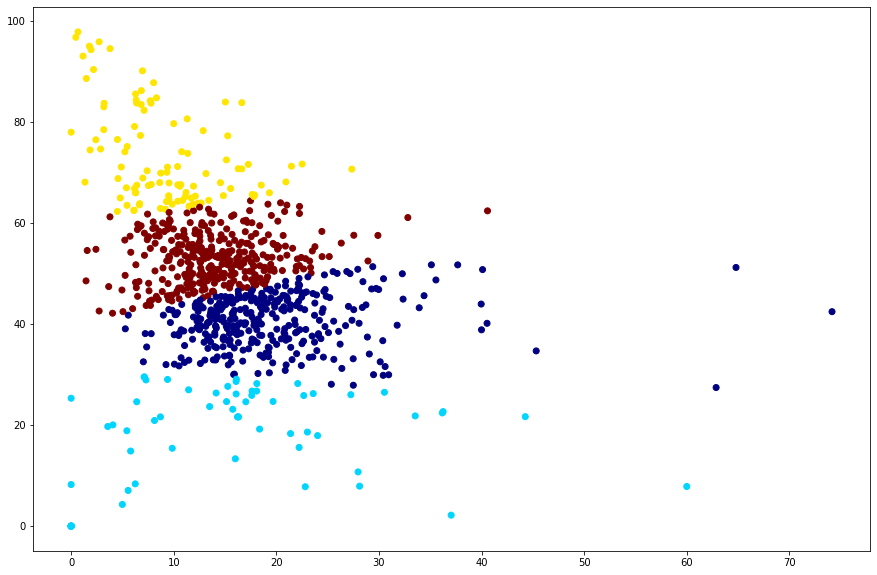

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(lookdata['saturation'], lookdata['intensity'], c= cm(scaled_labels))

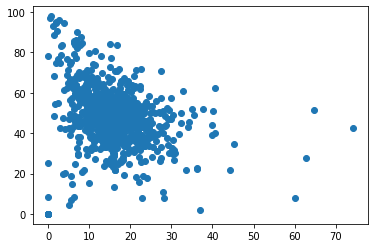

In [ ]:
plt.scatter(dataset['saturation'], dataset['intensity'])




plt.show()

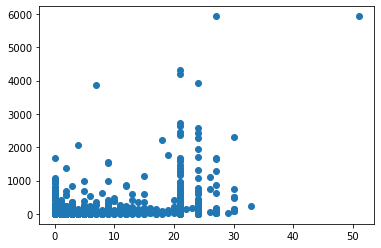

In [ ]:
plt.scatter(dataset['tag_post'], dataset['post'])




plt.show()

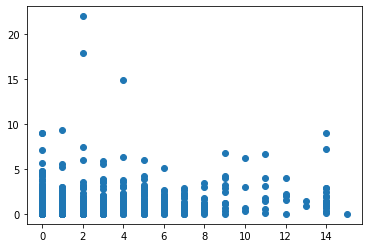

In [ ]:
plt.scatter(dataset['story'], dataset['emoji'])




plt.show()

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

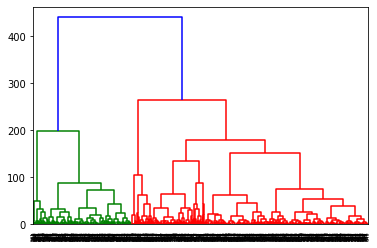

In [ ]:
dend = shc.dendrogram(shc.linkage(lookdata, method='ward'))

In [ ]:
# n개 군집까지 클러스터링 하기
predict=pd.DataFrame(shc.fcluster(shc.linkage(lookdata,method='ward'),4,criterion='distance'))
predict.columns=['predict']
predict

,predict
0,156
1,80
2,54
3,85
4,12
...,...
841,126
842,35
843,135
844,116


In [ ]:
 from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(lookdata)

array([0, 0, 2, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 3, 0, 1, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       3, 0, 0, 3, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 3, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 3, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 1, 0, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 1, 0, 3, 0, 0,
       3, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

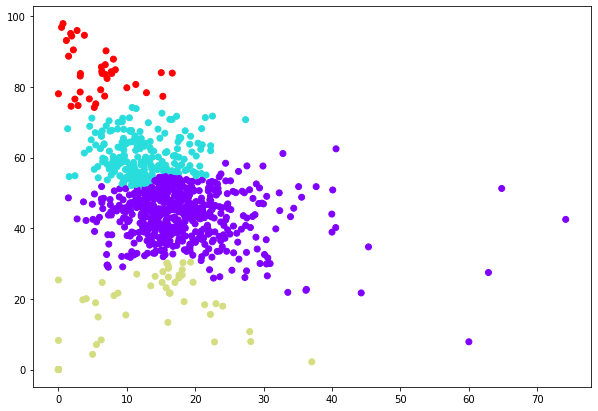

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(dataset['saturation'], lookdata['intensity'], c=cluster.labels_, cmap='rainbow')

In [ ]:
# 팔로워 팔로잉

In [ ]:
lookdata = pd.concat([dataset['follower'],dataset['following']],axis = 1)
lookdata = lookdata.dropna()
print(lookdata)

     follower  following
0         711        454
1          23         26
2          23         26
3         359        577
4         179        178
..        ...        ...
841     19700        132
842    450000          1
843     59300        177
844      1423        213
845       673        180

[846 rows x 2 columns]


In [ ]:
estimator = KMeans(init = 'k-means++', n_clusters = 4, n_init = 10)
estimator.fit(lookdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means = estimator
labels_predict = k_means.labels_

In [ ]:
labels_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0,
       0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# 클러스터별 색 구분 하기 위해서 0~1사이의 값으로 정규화
cm = plt.cm.get_cmap('jet')
scaled_labels = (labels_predict -np.min(labels_predict))
scaled_labels = scaled_labels / (np.max(labels_predict) - np.min(labels_predict))
np.unique(scaled_labels)


array([0.        , 0.33333333, 0.66666667, 1.        ])

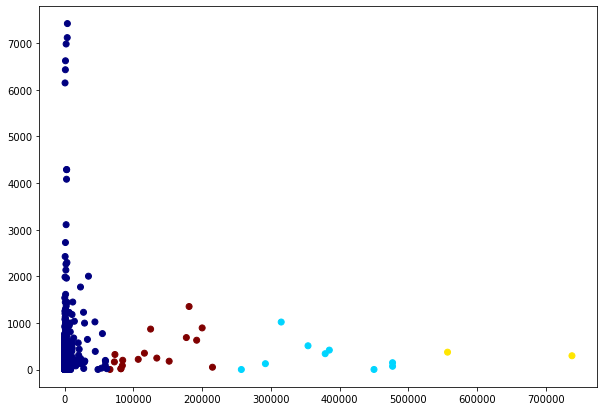

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(lookdata['follower'], lookdata['following'], c= cm(scaled_labels))

In [ ]:
cluster.fit_predict(lookdata)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

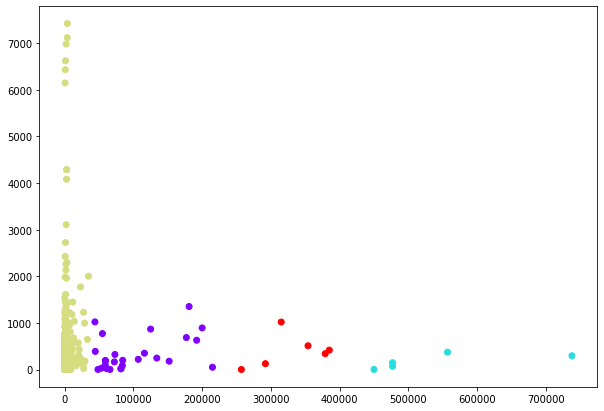

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(lookdata['follower'], lookdata['following'], c=cluster.labels_, cmap='rainbow')

In [ ]:

dataset

,mbti,id,secret,following,follower,post,tag_post,story,saturation,intensity,emoji
0,yun,yun_gommi,0,454,711,48,1,13,11.28247,47.98475,0.83333
1,yun,_ojnuy,0,26,23,120,1,3,20.72555,43.44227,0.94444
2,yun,geunho_rang2,0,26,23,0,0,0,0.00000,0.00000,0.00000
3,yun,cank.sh_yun,0,577,359,27,13,3,27.93781,50.87691,1.83333
4,yun,sh_yoon99,0,178,179,2,0,0,6.84354,86.27451,0.50000
...,...,...,...,...,...,...,...,...,...,...,...
841,seong,seong_ji_yeon,0,132,19700,598,0,3,13.94365,41.41318,3.13514
842,seong,sungziyoung,0,1,450000,231,0,0,10.71951,52.33842,1.19444
843,gangjun,kgjny_,0,177,59300,129,21,3,13.33144,35.20697,0.25000
844,gangjun,z_z107,0,213,1423,166,6,0,17.63811,37.06609,0.77778


In [ ]:
data = dataset.drop('mbti',axis = 1)
data = data.drop('id',axis =1)
data = data.drop('secret',axis=1)
data = data.dropna()
data

,following,follower,post,tag_post,story,saturation,intensity,emoji
0,454,711,48,1,13,11.28247,47.98475,0.83333
1,26,23,120,1,3,20.72555,43.44227,0.94444
2,26,23,0,0,0,0.00000,0.00000,0.00000
3,577,359,27,13,3,27.93781,50.87691,1.83333
4,178,179,2,0,0,6.84354,86.27451,0.50000
...,...,...,...,...,...,...,...,...
841,132,19700,598,0,3,13.94365,41.41318,3.13514
842,1,450000,231,0,0,10.71951,52.33842,1.19444
843,177,59300,129,21,3,13.33144,35.20697,0.25000
844,213,1423,166,6,0,17.63811,37.06609,0.77778


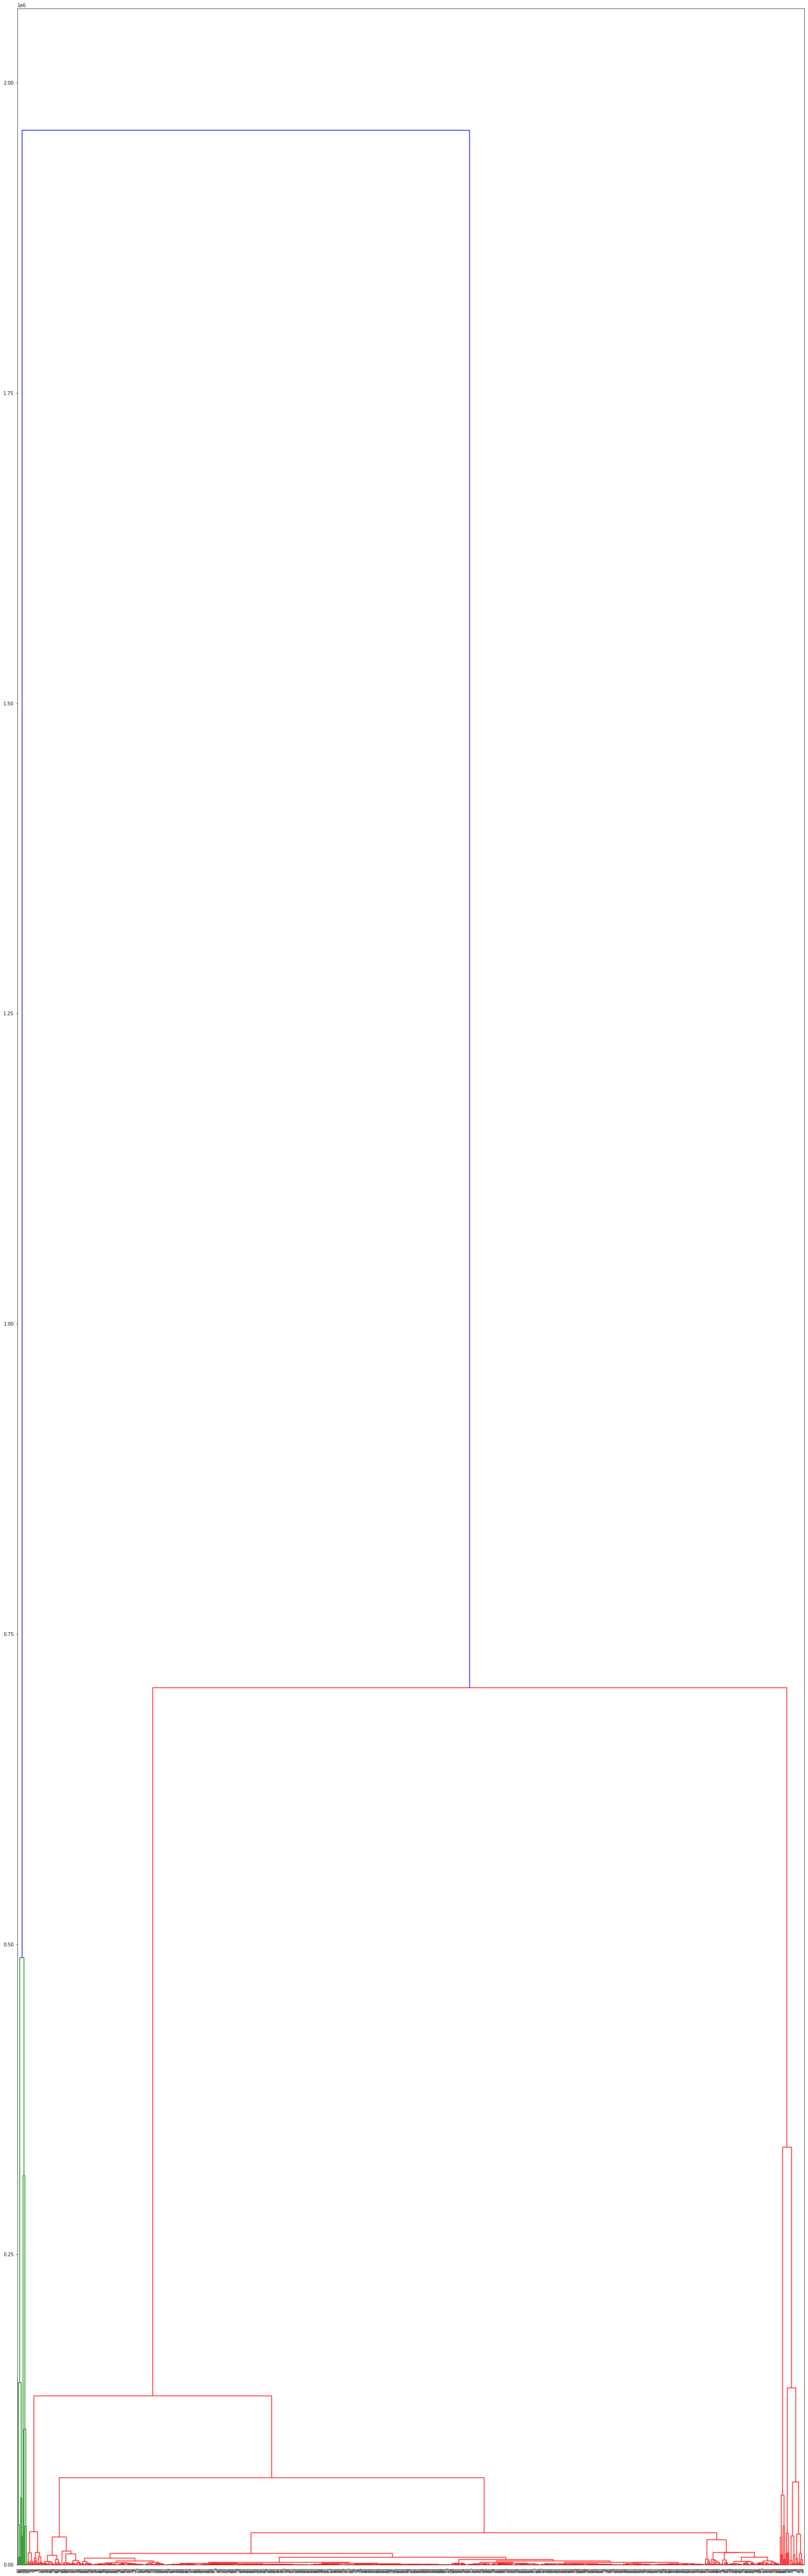

In [ ]:
plt.figure(figsize=(30, 100))
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
cluster = AgglomerativeClustering(n_clusters=42, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
c = cluster.fit_predict(data)
#9부터  792 -> 94%
#11부터 751 -> 89%
#19부터 670 -> 79% 
#33부터 580 -> 69%
#42부터 307 -> 36% : 42 -> 8 진행
for i in range(0,42):
  print(i, len(c[c == i]))

0 55
1 90
2 4
3 273
4 3
5 6
6 12
7 2
8 12
9 5
10 11
11 4
12 2
13 7
14 8
15 2
16 2
17 2
18 9
19 2
20 307
21 4
22 1
23 1
24 1
25 1
26 1
27 1
28 2
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 4


In [ ]:
c = cluster.fit_predict(data)

In [ ]:
dic = {}
for i in range(0,42):
  print(i,min(data[c == i]['follower']),max(data[c == i]['follower']))
  dic[i]=(min(data[c == i]['follower']))

0 1267 3691
1 134 1453
2 22200 25200
3 67 799
4 44000 48400
5 515 3934
6 503 2877
7 177000 181000
8 9222 11100
9 27400 29300
10 6198 8567
11 59000 61300
12 6433 6433
13 11700 14100
14 1731 3273
15 33100 34600
16 53500 54900
17 477000 477000
18 4120 5332
19 16200 16500
20 1 405
21 81800 84400
22 292000 292000
23 738000 738000
24 215000 215000
25 134000 134000
26 200000 200000
27 257000 257000
28 72300 73100
29 354000 354000
30 116000 116000
31 152000 152000
32 379000 379000
33 125000 125000
34 450000 450000
35 107000 107000
36 192000 192000
37 65900 65900
38 315000 315000
39 557000 557000
40 385000 385000
41 19700 21100


In [ ]:
sorted(dic.items(),key=(lambda x:x[1]))

[(20, 1),
 (3, 67),
 (1, 134),
 (6, 503),
 (5, 515),
 (0, 1267),
 (14, 1731),
 (18, 4120),
 (10, 6198),
 (12, 6433),
 (8, 9222),
 (13, 11700),
 (19, 16200),
 (41, 19700),
 (2, 22200),
 (9, 27400),
 (15, 33100),
 (4, 44000),
 (16, 53500),
 (11, 59000),
 (37, 65900),
 (28, 72300),
 (21, 81800),
 (35, 107000),
 (30, 116000),
 (33, 125000),
 (25, 134000),
 (31, 152000),
 (7, 177000),
 (36, 192000),
 (26, 200000),
 (24, 215000),
 (27, 257000),
 (22, 292000),
 (38, 315000),
 (29, 354000),
 (32, 379000),
 (40, 385000),
 (34, 450000),
 (17, 477000),
 (39, 557000),
 (23, 738000)]

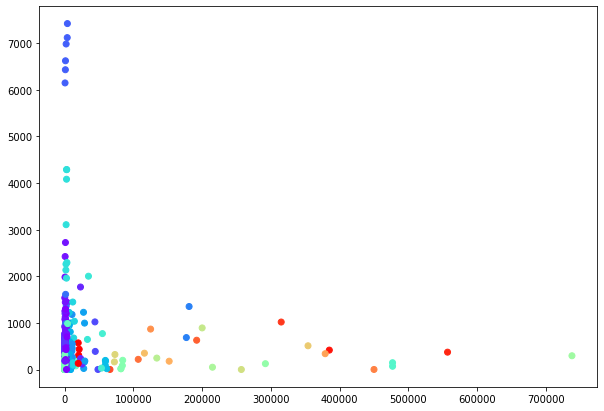

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['following'], c=cluster.labels_, cmap='rainbow')

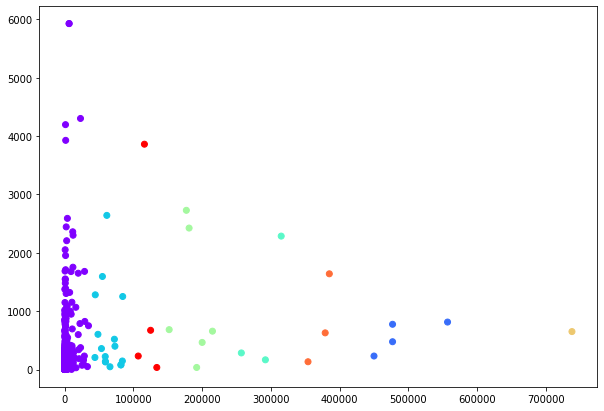

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['post'], c=cluster.labels_, cmap='rainbow')

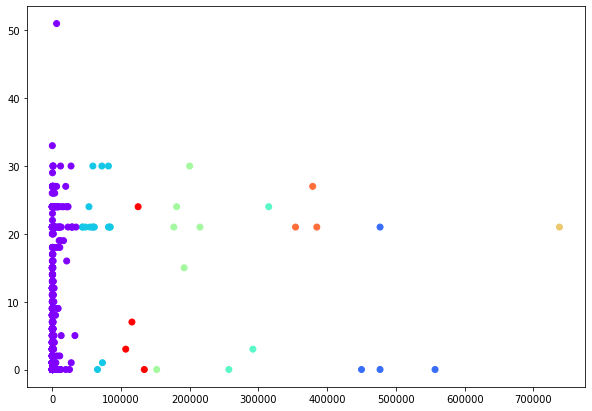

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['tag_post'], c=cluster.labels_, cmap='rainbow')

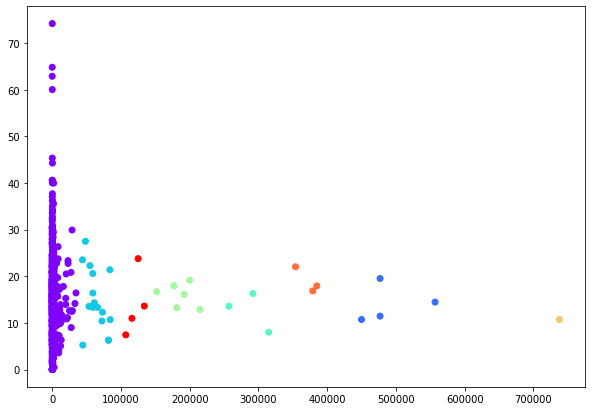

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['saturation'], c=cluster.labels_, cmap='rainbow')

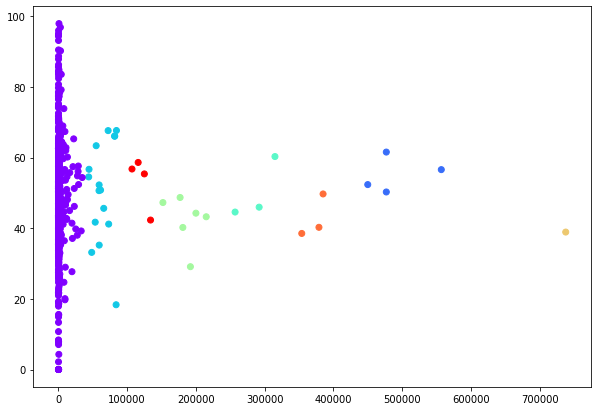

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['intensity'], c=cluster.labels_, cmap='rainbow')

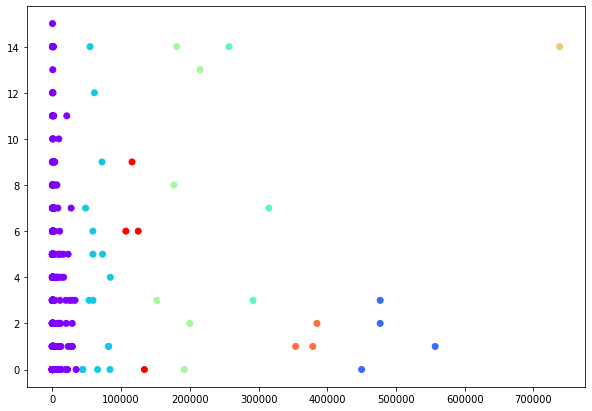

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['story'], c=cluster.labels_, cmap='rainbow')

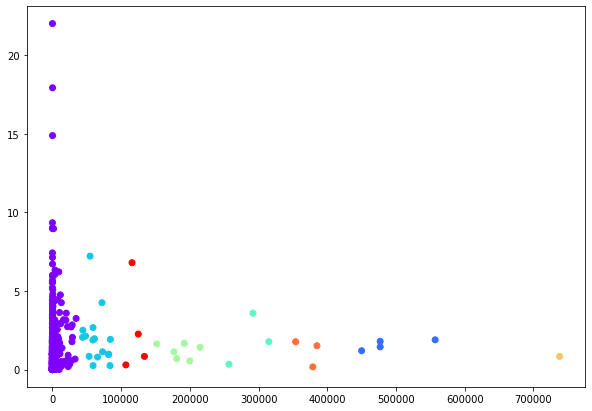

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data['follower'], data['emoji'], c=cluster.labels_, cmap='rainbow')